In [26]:
# import data
import pandas as pd
import numpy as np


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54808 entries, 0 to 54807
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    54808 non-null  int64  
 1   no_of_trainings               54808 non-null  int64  
 2   age                           54808 non-null  int64  
 3   previous_year_rating          54808 non-null  float64
 4   length_of_service             54808 non-null  int64  
 5   KPIs_met >80%                 54808 non-null  int64  
 6   awards_won?                   54808 non-null  int64  
 7   avg_training_score            54808 non-null  int64  
 8   is_promoted                   54808 non-null  float64
 9   department_Finance            54808 non-null  bool   
 10  department_HR                 54808 non-null  bool   
 11  department_Legal              54808 non-null  bool   
 12  department_Operations         54808 non-null  bool   
 13  depart

In [9]:
df.isna().sum() * 100 / len(df)

,0
Unnamed: 0,0.000000
employee_id,0.000000
department,0.000000
region,0.000000
education,4.397303
gender,0.000000
recruitment_channel,0.000000
no_of_trainings,0.000000
age,0.000000
previous_year_rating,7.581292


<Axes: >

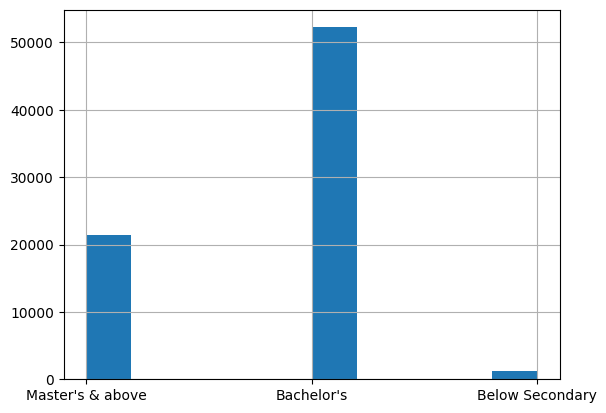

In [10]:
# fill null education, previous_year_rating
df.education.hist()

In [11]:
df.education.mode()[0]      # gia tri xuat hien nhieu nhat, so ) lay gtri dau tien

"Bachelor's"

In [12]:
df['education'].fillna(df.education.mode()[0], inplace=True)

/tmp/ipython-input-12-336495480.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['education'].fillna(df.education.mode()[0], inplace=True)


In [30]:
df.dropna(subset=['is_promoted'], inplace=True)

<Axes: >

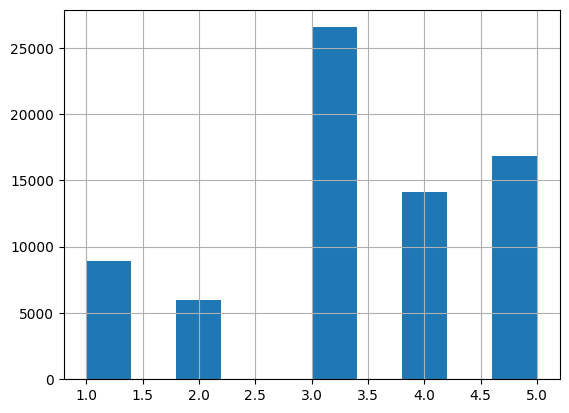

In [13]:
df.previous_year_rating.hist()

In [33]:
df.previous_year_rating.median()

3.0

In [15]:
df['previous_year_rating'].fillna(df.previous_year_rating.median(), inplace = True)

/tmp/ipython-input-15-644750002.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['previous_year_rating'].fillna(df.previous_year_rating.median(), inplace = True)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78298 entries, 0 to 78297
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            78298 non-null  int64  
 1   employee_id           78298 non-null  int64  
 2   department            78298 non-null  object 
 3   region                78298 non-null  object 
 4   education             78298 non-null  object 
 5   gender                78298 non-null  object 
 6   recruitment_channel   78298 non-null  object 
 7   no_of_trainings       78298 non-null  int64  
 8   age                   78298 non-null  int64  
 9   previous_year_rating  78298 non-null  float64
 10  length_of_service     78298 non-null  int64  
 11  KPIs_met >80%         78298 non-null  int64  
 12  awards_won?           78298 non-null  int64  
 13  avg_training_score    78298 non-null  int64  
 14  is_promoted           54808 non-null  float64
dtypes: float64(2), int6

In [17]:
df.isna().sum()

,0
Unnamed: 0,0
employee_id,0
department,0
region,0
education,0
gender,0
recruitment_channel,0
no_of_trainings,0
age,0
previous_year_rating,0


In [18]:
df.duplicated().sum()

np.int64(0)

EDA, thong ke du lieu

In [19]:
# df imbalance: chenh lech 2 nhan du lieu
df.columns


Index(['Unnamed: 0', 'employee_id', 'department', 'region', 'education',
       'gender', 'recruitment_channel', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [20]:
df

,Unnamed: 0,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0.0
1,1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0.0
2,2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0.0
3,3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0.0
4,4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78293,78293,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,0,61,NaN
78294,78294,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,0,74,NaN
78295,78295,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,0,50,NaN
78296,78296,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,3.0,1,0,0,70,NaN


<Axes: >

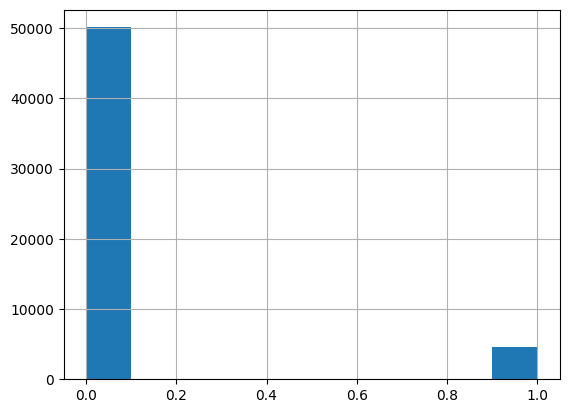

In [21]:
# check imbalance : qtrong vi co su chenh lech, de bi bias du lieu
df.is_promoted.hist()

# Oversampling with SMOTE (Synthetic Minority Over-sampling Technique)  -> tổ hợp các sample. Nó xem xét một mẫu lớp thiểu số, tìm những người hàng xóm gần đó (về mặt tính năng tương đồng) và tạo ra một điểm mới ở đâu đó dọc theo đường kết nối chúng.

In [22]:
# --- Feature Engineering --- one hot encoding
df = df.drop('employee_id', axis=1)
df = pd.get_dummies(df, columns=['department', 'region', 'education', 'gender', 'recruitment_channel'], drop_first=True)

In [23]:
df

,Unnamed: 0,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,0,1,35,5.0,8,1,0,49,0.0,False,...,False,False,True,False,False,False,True,False,False,True
1,1,1,30,5.0,4,0,0,60,0.0,False,...,False,False,False,False,False,False,False,True,False,False
2,2,1,34,3.0,7,0,0,50,0.0,False,...,False,False,False,False,False,False,False,True,False,True
3,3,2,39,1.0,10,0,0,50,0.0,False,...,False,False,False,False,False,False,False,True,False,False
4,4,1,45,3.0,2,0,0,73,0.0,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78293,78293,1,24,3.0,1,0,0,61,NaN,False,...,False,False,False,False,False,True,False,True,False,True
78294,78294,1,31,3.0,7,0,0,74,NaN,False,...,False,False,False,False,False,False,False,True,False,True
78295,78295,1,26,4.0,4,0,0,50,NaN,False,...,False,False,False,False,False,False,False,False,False,True
78296,78296,3,27,3.0,1,0,0,70,NaN,False,...,False,False,False,False,False,False,False,True,False,True


In simple terms: This line creates a new DataFrame called X that includes every column from your original data EXCEPT for the is_promoted column. X contains all the information the model will use to learn, such as age, department, avg_training_score, etc.

1. Features (X): Would be all the factors you use to make a guess, like hours_studied, previous_test_scores, and class_attendance.
2. Target (y): Would be the actual final_exam_score that you are trying to predict

In [24]:
# Separate features (X) and target (y)
# Features (X): The input variables that your model will use to make predictions.
# Target (y): The output variable that your model will try to predict.

X = df.drop('is_promoted', axis=1)
y = df['is_promoted']

#axis=1: This is a crucial parameter. It tells pandas that you want to drop a column.
# (If you were to use axis=0, it would look for a row with the index 'is_promoted', which isn't what we want


In [36]:
# Before SMOTE: Đây là hàm pandas đếm số lần xuất hiện của mỗi giá trị duy nhất trong chuỗi y. Vì y chứa 0 (Không được thăng chức) và 1 (Được thăng chức)

print("--- Class Distribution Before SMOTE ---")
print(y.value_counts())
print("\n")


--- Class Distribution Before SMOTE ---
is_promoted
0.0    50140
1.0     4668
Name: count, dtype: int64




In [37]:
import pandas as pd
# Initialize SMOTE
smote = SMOTE(random_state=42)
# Thiết lập random_state đảm bảo rằng mỗi lần bạn chạy mã này, SMOTE sẽ tạo ra chính xác cùng một điểm dữ liệu "ngẫu nhiên".
# Điều này rất quan trọng để có được kết quả nhất quán trong các thí nghiệm. Số 42 chỉ là một lựa chọn thông thường; bất kỳ số nào cũng được

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:399: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y contains NaN.

In [40]:

from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, ADASYN

print("--- Class Distribution Before SMOTE ---")
print(y.value_counts())
print("\n")

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

print("--- Class Distribution After SMOTE ---")
# y_resampled is now a pandas Series, we can use value_counts() on it
print(pd.Series(y_resampled).value_counts())
print("\n")

print(f"Shape of features before SMOTE: {X.shape}")
print(f"Shape of features after SMOTE: {X_resampled.shape}")

--- Class Distribution Before SMOTE ---
is_promoted
0.0    50140
1.0     4668
Name: count, dtype: int64




/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:399: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y contains NaN.

In [42]:
df.corr()


,Unnamed: 0,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,department_Finance,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
Unnamed: 0,1.000000,0.005811,0.000552,-0.005964,-0.000804,-0.003276,0.001575,-0.005290,0.001811,0.003426,...,-0.001516,-0.003493,0.000821,0.002109,-0.004336,0.004023,-0.000506,-0.002584,0.002017,0.003790
no_of_trainings,0.005811,1.000000,-0.081278,-0.061564,-0.057275,-0.045576,-0.007628,0.042517,-0.024896,0.018442,...,-0.012706,-0.016540,0.005030,-0.032443,0.000939,0.004562,-0.034053,0.084501,-0.013615,-0.008358
age,0.000552,-0.081278,1.000000,0.026810,0.657111,-0.025592,-0.008169,-0.048380,-0.017166,-0.078936,...,-0.031608,-0.061456,0.034153,-0.043523,-0.059563,-0.174815,0.363260,-0.016293,-0.042124,-0.005225
previous_year_rating,-0.005964,-0.061564,0.026810,1.000000,0.023504,0.337367,0.026587,0.071926,0.153230,0.026371,...,-0.025491,-0.014157,0.020395,0.006713,-0.033911,-0.002386,0.027689,-0.024024,0.065856,-0.003831
length_of_service,-0.000804,-0.057275,0.657111,0.023504,1.000000,-0.077693,-0.039927,-0.038122,-0.010670,-0.054025,...,-0.018111,-0.041024,0.026352,-0.032593,-0.040693,-0.119119,0.249536,-0.019675,-0.030292,0.001513
KPIs_met >80%,-0.003276,-0.045576,-0.025592,0.337367,-0.077693,1.000000,0.097000,0.078391,0.221582,0.028987,...,-0.028187,-0.010575,0.005167,0.013520,-0.030154,0.012278,0.010452,-0.037400,0.047621,-0.007178
awards_won?,0.001575,-0.007628,-0.008169,0.026587,-0.039927,0.097000,1.000000,0.072138,0.195871,0.006487,...,-0.008006,-0.002163,-0.001804,-0.000198,-0.001018,-0.004691,-0.000773,0.002381,0.003004,-0.005902
avg_training_score,-0.005290,0.042517,-0.048380,0.071926,-0.038122,0.078391,0.072138,1.000000,0.181147,-0.052132,...,0.028359,-0.019396,0.012904,0.002419,-0.015341,0.014050,0.030857,-0.024494,0.030496,-0.006805
is_promoted,0.001811,-0.024896,-0.017166,0.153230,-0.010670,0.221582,0.195871,0.181147,1.000000,-0.003109,...,-0.016838,-0.015693,0.023841,-0.001676,-0.020817,-0.000849,0.029343,-0.011109,0.018641,-0.000483
department_Finance,0.003426,0.018442,-0.078936,0.026371,-0.054025,0.028987,0.006487,-0.052132,-0.003109,1.000000,...,-0.018085,0.009405,-0.001251,-0.009038,-0.010392,0.049638,-0.037381,0.014013,-0.029091,-0.001126


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

Scaling

<Axes: >

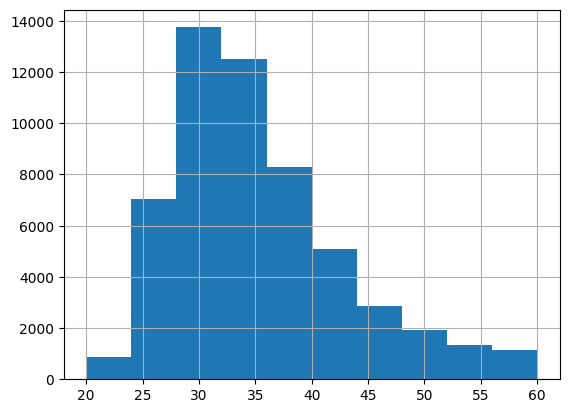

In [45]:
df.age.hist()

<Axes: >

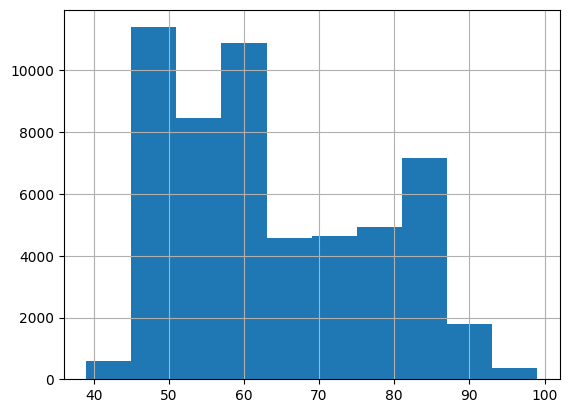

In [47]:
df.avg_training_score.hist()